In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Descriptive Exploration on our Data

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Selecting features for building model

In [15]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


### Plots

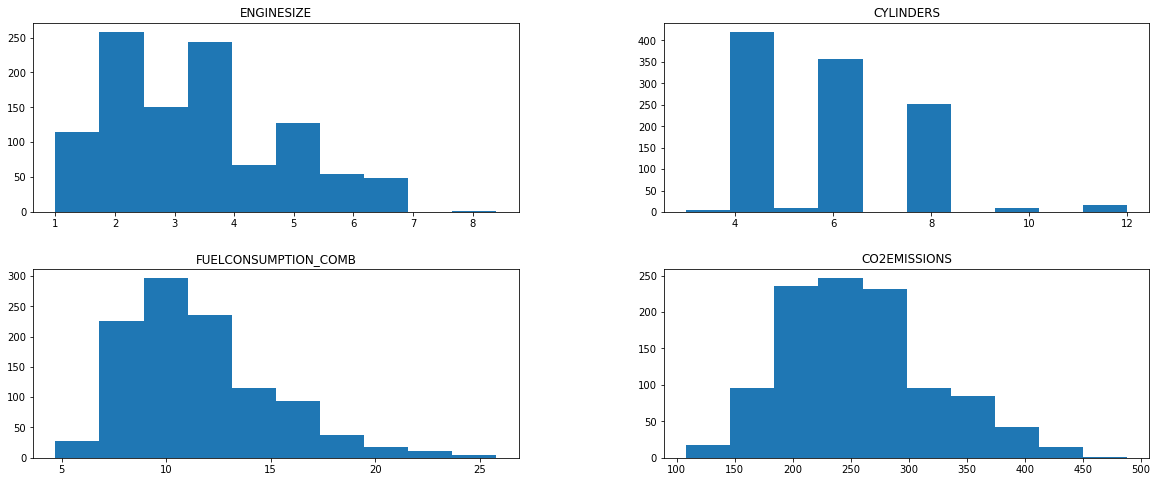

In [111]:
ax = cdf.hist(figsize = (20, 8), grid = False)
plt.show()

### Relation btw Enginesize and CO2 Emissions

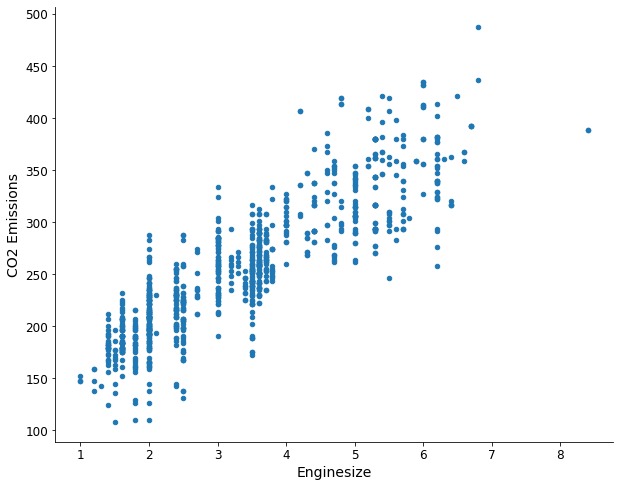

In [102]:
ax = cdf.plot(kind = 'scatter', x = 'ENGINESIZE', y ='CO2EMISSIONS', figsize = (10,8))
plt.xlabel("Enginesize", fontsize = 14)
plt.ylabel("CO2 Emissions", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### Splitting Data set into training and test data.

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Using Sklearn to build Linear Regression model 

In [18]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(train[['ENGINESIZE']], train[['CO2EMISSIONS']])
print("Slope : {}, Intercept : {}".format(lr.coef_, lr.intercept_))
lr_coef = lr.coef_
lr_intercept = lr.intercept_

Slope : [[39.60513968]], Intercept : [123.55342177]


### Plot output

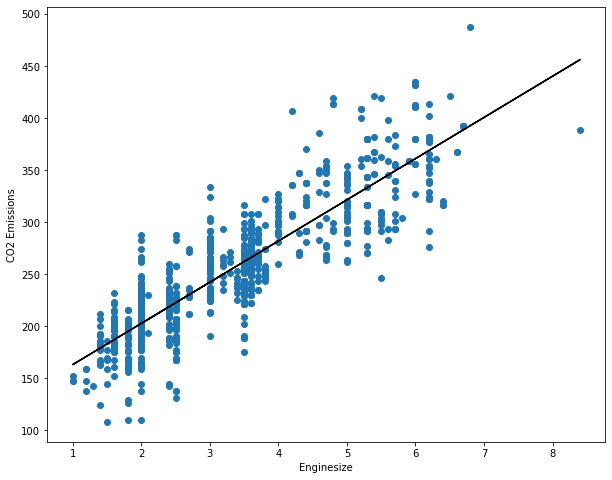

In [71]:
plt.figure(figsize = (10,8))
plt.scatter(x = train[['ENGINESIZE']], y = train[['CO2EMISSIONS']])
plt.xlabel("Enginesize")
plt.ylabel("CO2 Emissions")
plt.plot( train[['ENGINESIZE']],  lr_intercept + lr_coef * train[['ENGINESIZE']], color = 'black')
plt.show()

### Model Evaluation using MAE, MSE, R-Squared

In [51]:
from sklearn.metrics import r2_score
test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
test_pred = lr.predict(test[['ENGINESIZE']])
print("Mean absolute error value: {}".format(np.mean(np.absolute(test_pred - test_y))))
print("Mean sqaured error value: {}".format(np.mean((test_pred - test_y) ** 2)))
print("R sqaured error value: %.2f"%r2_score(test_y, test_pred))

Mean absolute error value: CO2EMISSIONS    23.770375
dtype: float64
Mean sqaured error value: CO2EMISSIONS    1003.193089
dtype: float64
R sqaured error value: 0.74
